## Libraries

In [1]:
# linear algebra and data processing
import numpy as np
import pandas as pd

#visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# data preprocessing
from sklearn.preprocessing import LabelEncoder

# ignnore warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

## Loading data

In [2]:
df = pd.read_csv('../data/data.csv')

## Exploratory Data Analysis


- In this section, we perform some exploratory data analysis on our dataframe to get a general idea of what our dataframe consists of and to manipulate it if required.

In [3]:
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [4]:
#basic insight on our columns and understand their properties and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#summary statistics of the data.
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

- There are no NAN values

In [8]:
df.shape

(569, 32)

- Dataset have 569 rows and 32 Columns

In [9]:
df['diagnosis'].agg(['count', 'size', 'nunique'])

count      569
size       569
nunique      2
Name: diagnosis, dtype: int64

In [10]:
pd.value_counts(df['diagnosis'])

B    357
M    212
Name: diagnosis, dtype: int64

- Class distribution: 357 benign (not cancer), 212 malignant (cancer)


In [11]:
def count_plot(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(10, 8))
    sns.countplot(data=df, x=column,palette=["blue", "skyblue"])
    plt.xlabel(f'{column}', fontsize=17)
    plt.ylabel("Count", fontsize=17)
    plt.title(f'\nDistribution of {column}\n', size=18, fontweight='bold')
    plt.show()

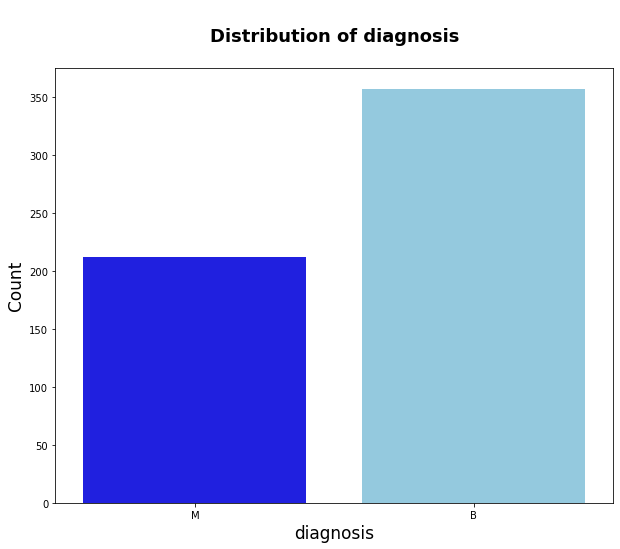

In [12]:
count_plot(df, "diagnosis")


- Diagnosis Column have 2 unique values Malignant(M) and Benign(B) having count of 212 and 357 respectively.

In [13]:
#converting categorical coumns, into numerical by using one hot encoding 
for column in df.columns:
  if df[column].dtype == np.int64 or df[column].dtype == np.float64:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

<function matplotlib.pyplot.show(close=None, block=None)>

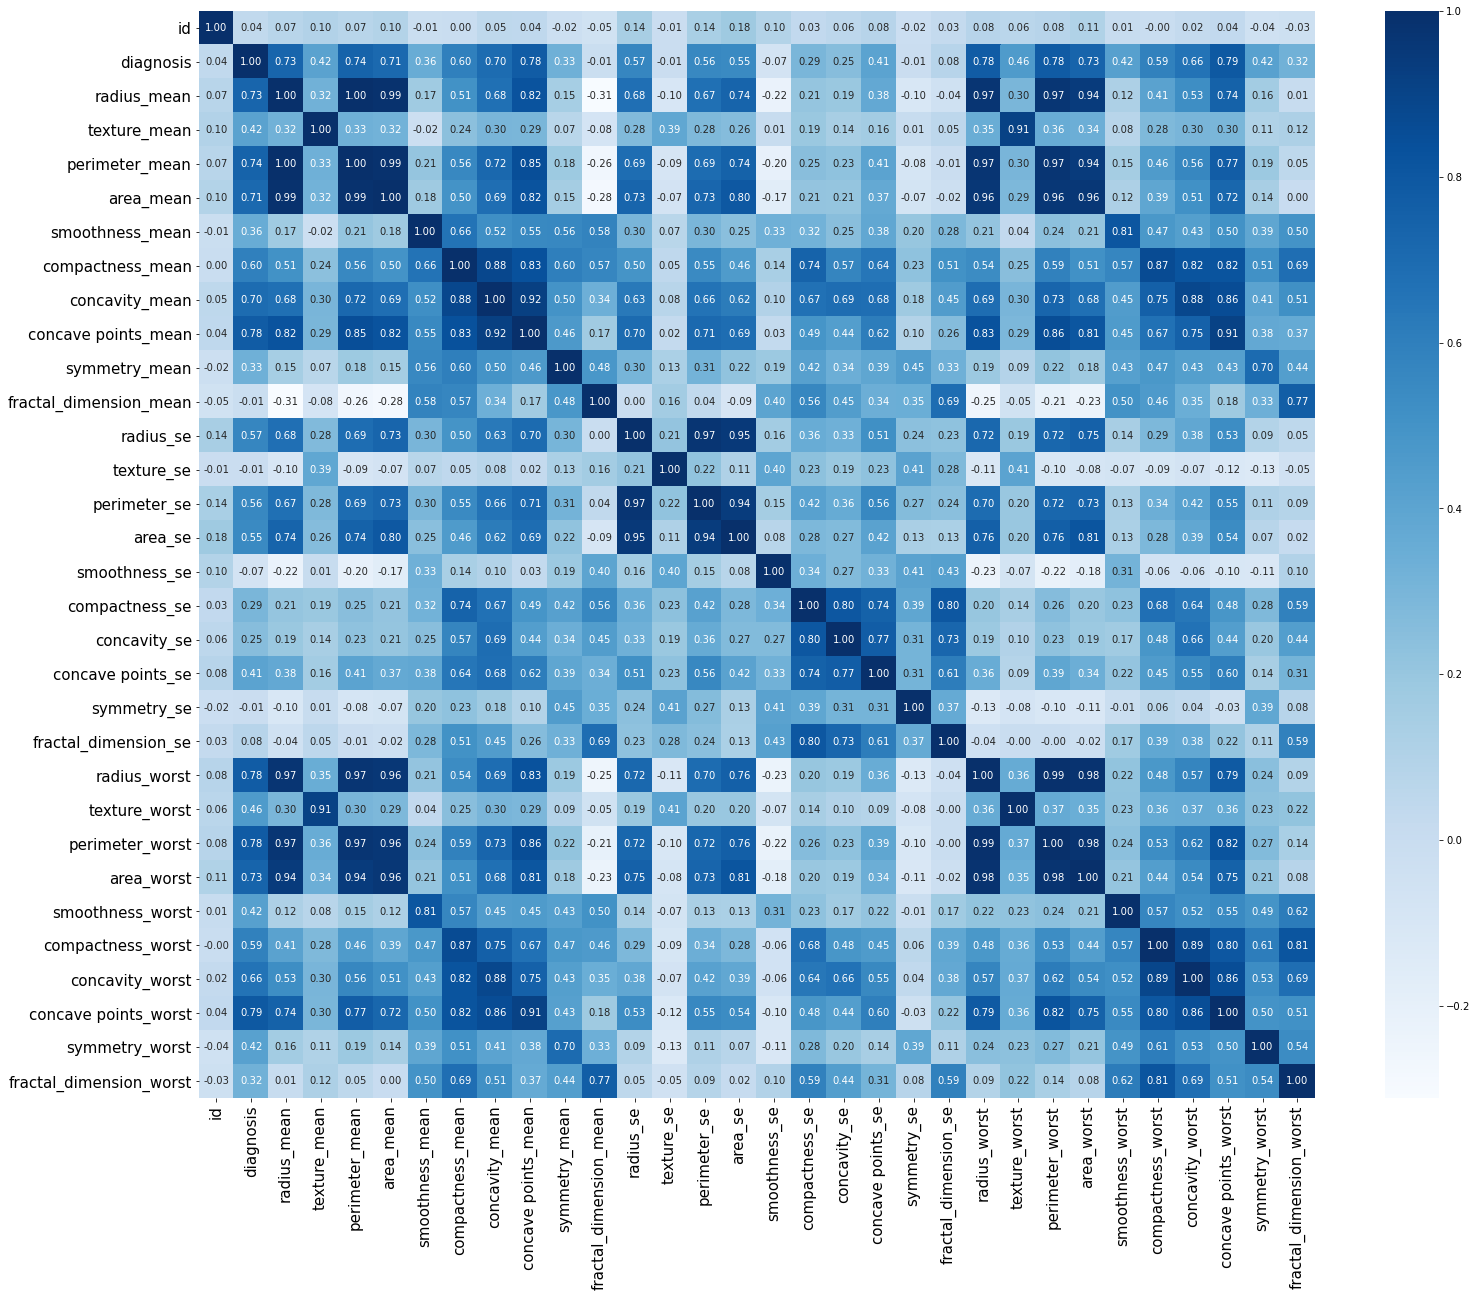

In [14]:
# heatmap to check for the highly correlated columns
plt.figure(figsize=(25, 20))
res=sns.heatmap(df.corr(), annot=True,cmap="Blues",fmt='.2f');
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)
plt.show

- As we can observe from the heatmaps that there are many negative correlations in this dataset.

- There are many attributes with correalation under less than 0.5.lets find the high correlated columns

In [15]:
high_corr_data = df.corr()
high_corr_columns = high_corr_data.index[abs(high_corr_data['diagnosis'])>=0.5]

Text(0.5, 1.0, 'Heatmap of highly correlated columns\n')

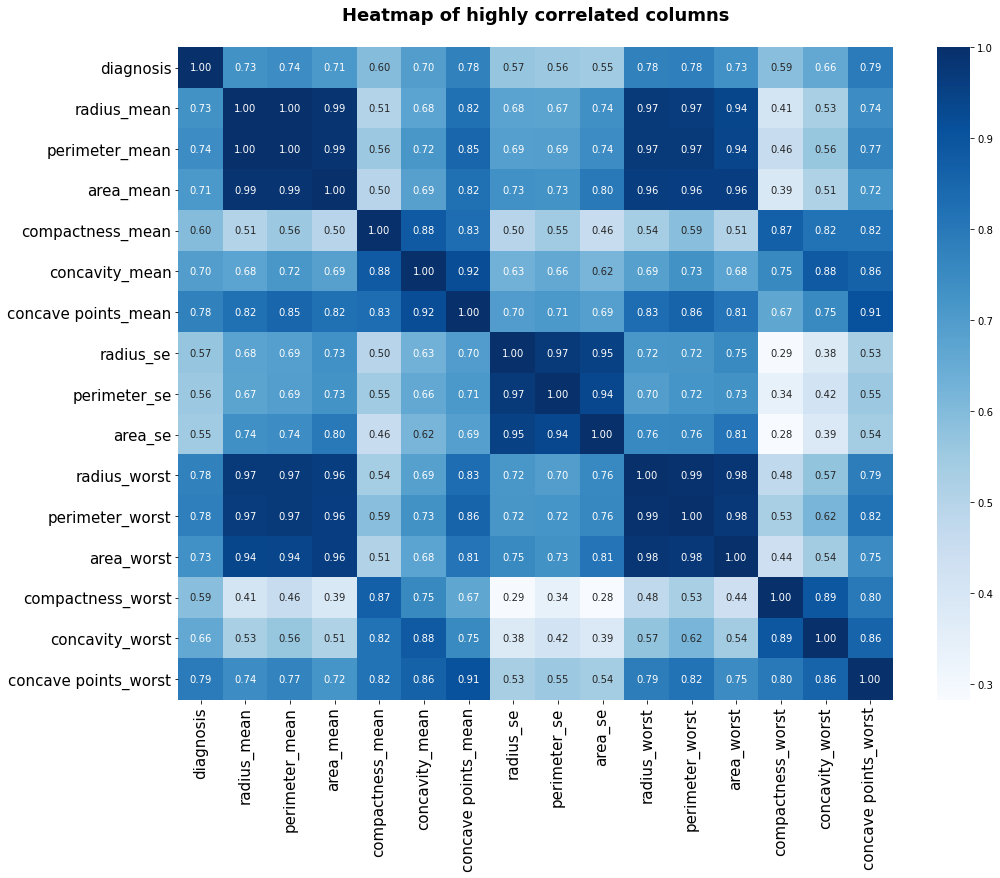

In [16]:
#heatmap of highly correlated columns
plt.figure(figsize=(16, 12))
res=sns.heatmap(df[high_corr_columns].corr(), annot=True,cmap="Blues",fmt='.2f');
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)
plt.title('Heatmap of highly correlated columns\n', size=18, fontweight='bold')



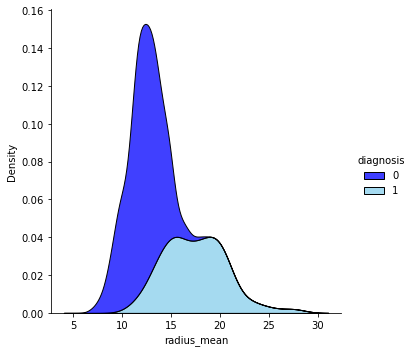

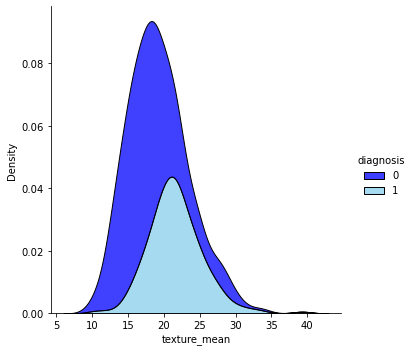

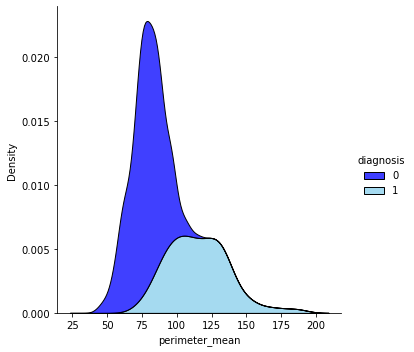

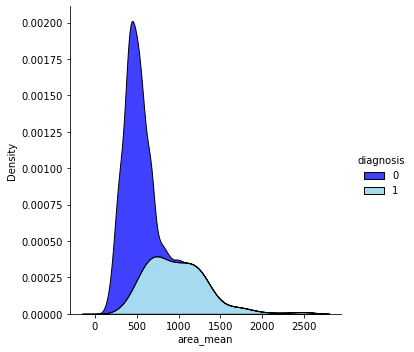

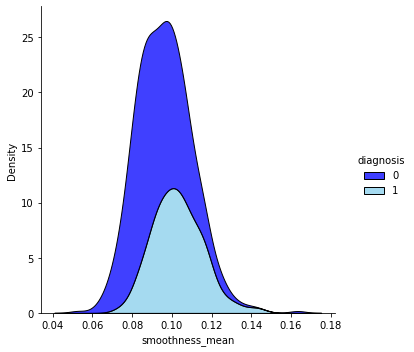

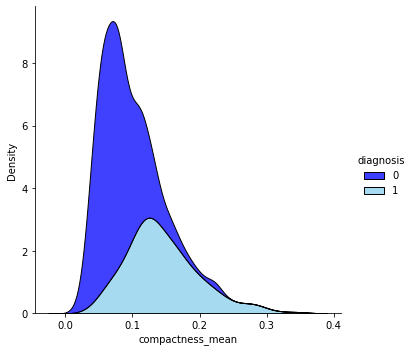

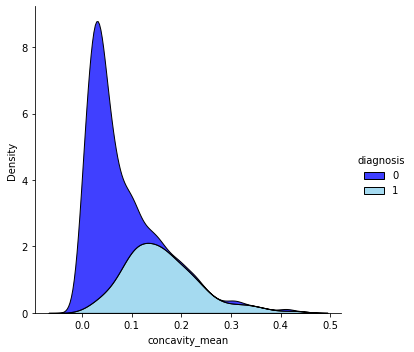

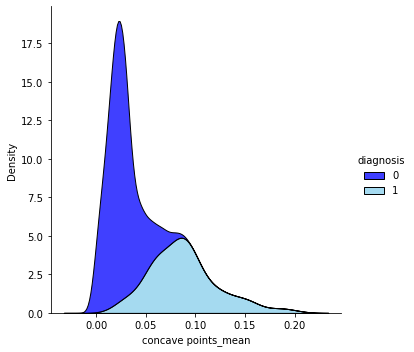

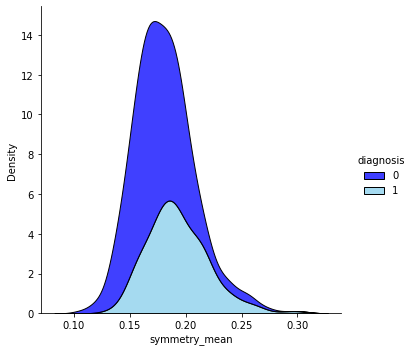

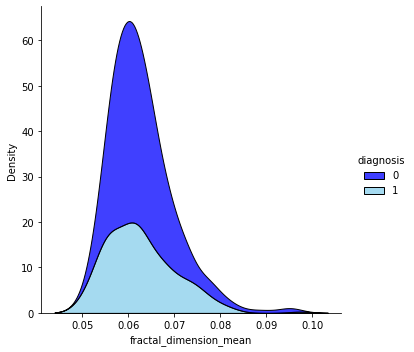

In [17]:
#difference between the mean values of attributes of the two types of cancer
mean_col = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

for col in mean_col:
    sns.displot(df, x=col, hue="diagnosis", kind="kde", multiple="stack",palette=["blue", "skyblue"])

- From the above plots,we can see that the radius mean,texture mean, perimeter mean, area mean, smoothness mean, compactness mean, concavity mean, concave points mean, symmetry mean and the fractal dimenion mean significantly vary in the different types of tumors.

### Relationship Between Features & Diagnosis

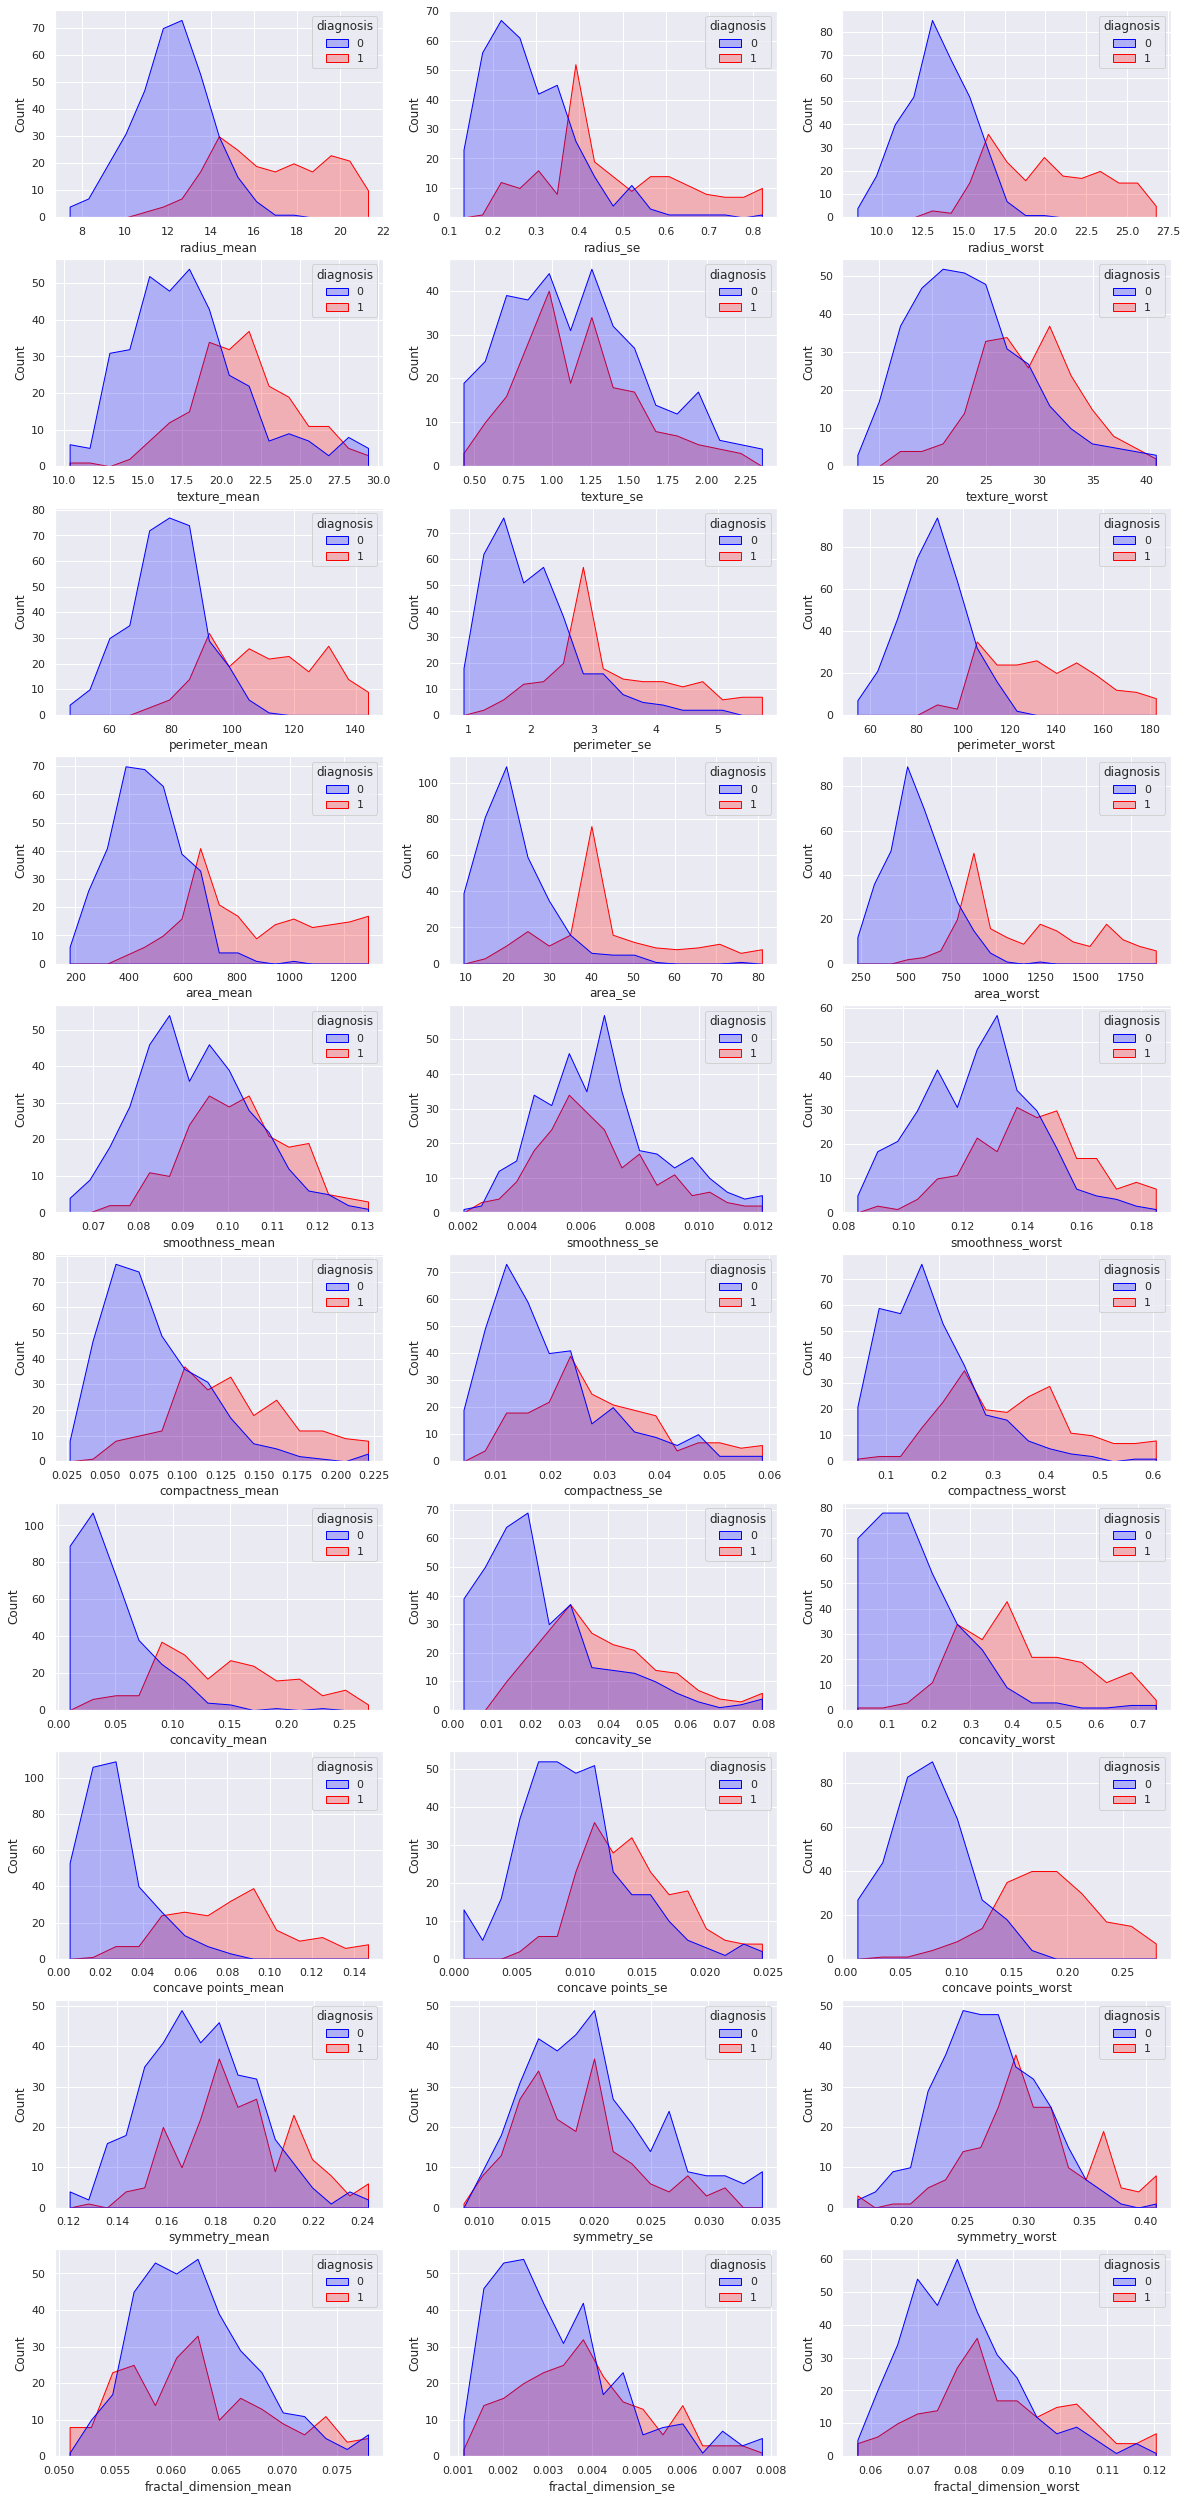

In [33]:
fig, axs = plt.subplots(10,3, figsize=(20,45))

for col in range(len(columns)):  
    for f in range(len(fields)):  
        sns.histplot(df, 
                     x=columns[col]+"_"+fields[f], 
                     hue="diagnosis", element="poly", 
                     stat="count", 
                     palette=["blue", "red"],
                     ax=axs[col][f])

### Exploring the Outliers in the Data

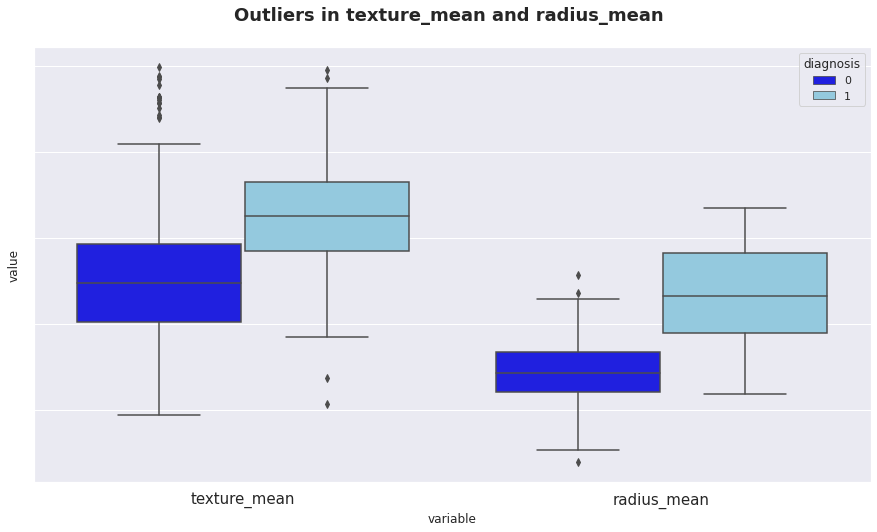

In [20]:
sns.set(style="darkgrid")
melted_data = pd.melt(df, id_vars='diagnosis', value_vars=['texture_mean', 'radius_mean',])
plt.figure(figsize=(15, 8))
res=sns.boxplot(x='variable', y='value', hue='diagnosis', data=melted_data,palette=["blue", "skyblue"])
plt.title('Outliers in texture_mean and radius_mean \n', size=18, fontweight='bold')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)
plt.show()

In [19]:
#transform outlier to the mean of each column
columns = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"]
fields = ["mean", "se", "worst"]
for col in range(len(columns)):
    
    for f in range(len(fields)):
        
        Q1 = df[columns[col]+"_"+fields[f]].quantile(0.25)
        Q3 = df[columns[col]+"_"+fields[f]].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        outliers = (df[columns[col]+"_"+fields[f]] < lower_bound) | (df[columns[col]+"_"+fields[f]] > upper_bound)
        df[columns[col]+"_"+fields[f]][outliers] = df[columns[col]+"_"+fields[f]].mean()